In [1]:
import nibabel as nib
import numpy as np
import os

In [3]:
data_path = "F:\\Code\\structSeg2019\\Lung_GTV\\1"
data = os.path.join(data_path, "data.nii.gz")
label = os.path.join(data_path, "label.nii.gz")

In [4]:
print(data)
print(label)

F:\Code\structSeg2019\Lung_GTV\1\data.nii.gz
F:\Code\structSeg2019\Lung_GTV\1\label.nii.gz


In [7]:
imgfile = nib.load(data)
imgdata = imgfile.get_fdata()

print(imgdata.shape)

labelfile = nib.load(label)
labeldata = labelfile.get_fdata().astype(np.uint8)
print(labeldata.shape)

(512, 512, 96)
(512, 512, 96)


In [6]:
print(imgdata.dtype)
print(labeldata.dtype)

float64
float64


In [8]:
mask = labeldata>0

In [9]:
a = np.unique(mask)
print(a)

[False  True]


In [10]:
margin = 64/2

In [11]:
margin

32.0

In [13]:
D,H,W = labeldata.T.shape
print(D,H,W)

96 512 512


In [16]:
labeldata.T[:,3].shape

(96, 512)

In [28]:
D_s, D_e = 0, D - 1
H_s, H_e = 0, H - 1
W_s, W_e = 0, W - 1
print(D_s, D_e, H_s, H_e, W_s, W_e)

0 95 0 511 0 511


In [20]:
labeldata =labeldata.T

In [29]:
while D_s < D:
    if labeldata[D_s].sum() != 0:
        break
    D_s += 1
while D_e > D_s:
    if labeldata[D_e].sum() != 0:
        break
    D_e -= 1
while H_s < H:
    if labeldata[:, H_s].sum() != 0:
        break
    H_s += 1
while H_e > H_s:
    if labeldata[:, H_e].sum() != 0:
        break
    H_e -= 1
while W_s < W:
    if labeldata[:, :, W_s].sum() != 0:
        break
    W_s += 1
while W_e > W_s:
    if labeldata[:, :, W_e].sum() != 0:
        break
    W_e -= 1

In [30]:
print(D_s, D_e)
print(H_s, H_e)
print(W_s, W_e)

47 50
338 353
299 315


In [26]:
# 这个方法取得不太对？
D_s = max(0, D_s - margin)
D_e = min(D - 1, D_e + margin)
H_s = max(0, H_s - margin)
H_e = min(H - 1, H_e + margin)
W_s = max(0, W_s - margin)
W_e = min(W - 1, W_e + margin)

In [27]:
print(D_s, D_e)
print(H_s, H_e)
print(W_s, W_e)

15.0 82.0
306.0 385.0
267.0 347.0


In [31]:
D_half = (D_s + D_e) // 2
H_half = (H_s + H_e) // 2
W_half = (W_s + W_e) // 2

In [32]:
print(D_half, H_half, W_half)

48 345 307


In [33]:
D_s = max(0, D_half - margin)
D_e = min(D - 1, D_half + margin)
H_s = max(0, H_half - margin)
H_e = min(H - 1, H_half + margin)
W_s = max(0, W_half - margin)
W_e = min(W - 1, W_half + margin)

In [34]:
print(D_s, D_e)
print(H_s, H_e)
print(W_s, W_e)

16.0 80.0
313.0 377.0
275.0 339.0


In [35]:
D_s = int(D_s)
D_e = int(D_e)
H_s = int(H_s)
H_e = int(H_e)
W_s = int(W_s)
W_e = int(W_e)

In [36]:
print(D_s, D_e)
print(H_s, H_e)
print(W_s, W_e)

16 80
313 377
275 339


In [37]:
imgdata = imgdata.T

In [38]:
imgdata.shape

(96, 512, 512)

In [40]:
data = imgdata[D_s:D_e, H_s: H_e, W_s:W_e]
label = labeldata[D_s:D_e, H_s: H_e, W_s:W_e]

In [41]:
data.shape

(64, 64, 64)

In [42]:
label.shape

(64, 64, 64)

In [43]:
def rotate(inputs, labels, num_of_rots, axes):
    '''
    num_of_rots : integer. Number of times the array is rotated by 90 degrees.
    axes : (2,) array_like. The array is rotated in the plane defined by the axes. Axes must be different.
    '''
    return np.rot90(inputs, num_of_rots, axes), np.rot90(labels, num_of_rots, axes)

In [45]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "svg"


<Figure size 640x480 with 1 Axes>

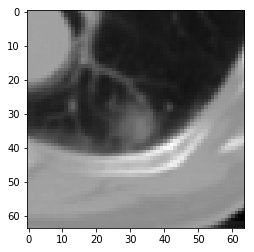

In [48]:
plt.imshow(data[31],cmap="gray") 
plt.show()

In [49]:
d_1,l_1 = rotate(data, label, 1, (1,2))

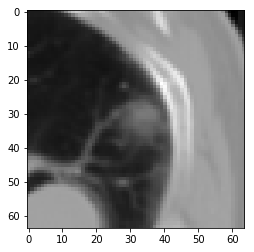

In [51]:
plt.imshow(d_1[31],cmap="gray") 
plt.show()